# GRADUATE ADMISSION

![](https://images.prismic.io/etswebsiteprod/580d75dbe5d0ddb934a4fd383b94c634966a2d2f_academy-celebrate-celebration-267885.jpg?auto=compress,format)

**A graduate application is to be completed by a student who wants to enroll in a Master's or doctoral degree. A graduate application will be reviewed by the department that the student applies to along with a Graduate Program Director and/or an admissions committee.**
**So in this dataset we will predict the Graduate Admissions from an Indian perspective.**



# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline


# LOADING THE DATASET

In [2]:
data=pd.read_csv('../input/graduate-admissions/Admission_Predict.csv')


In [3]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
data.value_counts()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  Chance of Admit 
1           337        118          4                  4.5  4.5   9.65  1         0.92                1
264         324        111          3                  2.5  1.5   8.79  1         0.70                1
274         312        99           1                  1.0  1.5   8.01  1         0.52                1
273         294        95           1                  1.5  1.5   7.64  0         0.49                1
272         299        96           2                  1.5  2.0   7.86  0         0.54                1
                                                                                                     ..
131         339        114          5                  4.0  4.5   9.76  1         0.96                1
130         333        118          5                  5.0  5.0   9.35  1         0.92                1
129         326        112          3                  3.5  3.0   9.1

In [8]:
data.shape

(400, 9)

In [9]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [10]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

**Checking Null Value**

In [11]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [12]:
data.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

**So our dataset does not contain any null values**.

# **Exploratory Data Analysis**

**HISTOGRAM**

**A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.**



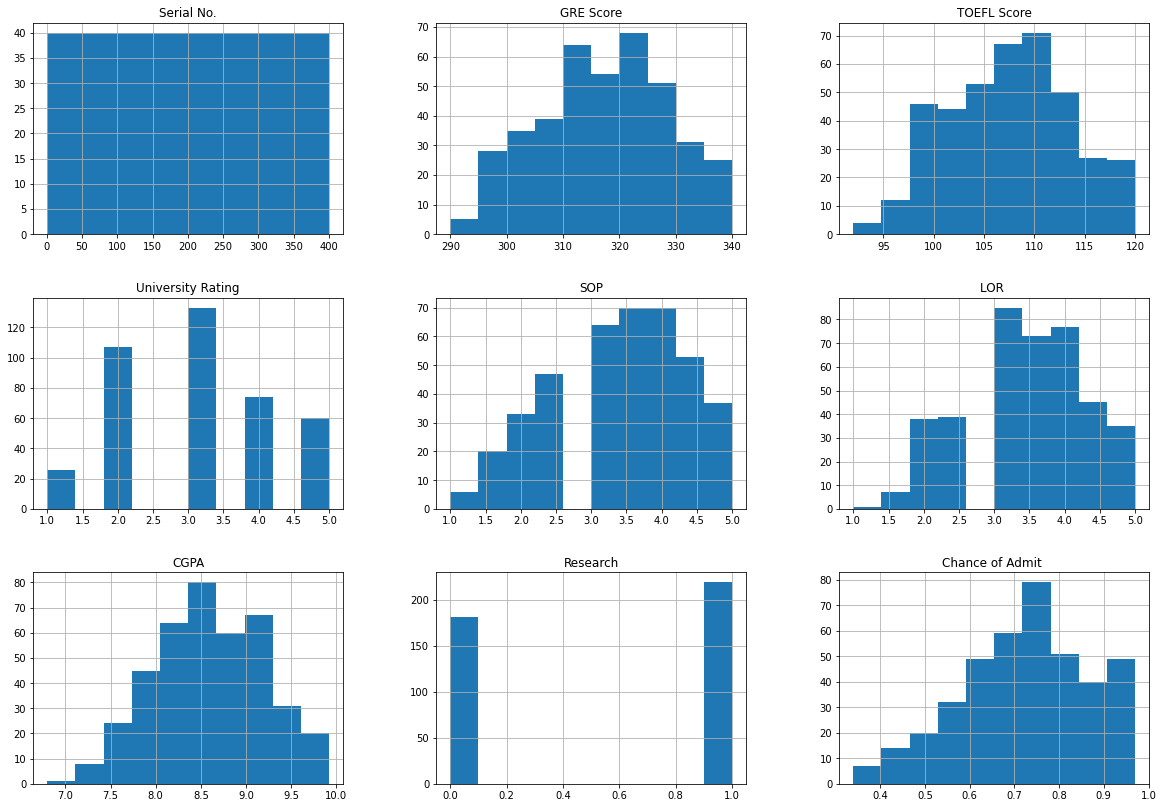

In [13]:
data.hist(figsize=(20,14))
plt.show()


**PAIRPLOT**

**A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.**



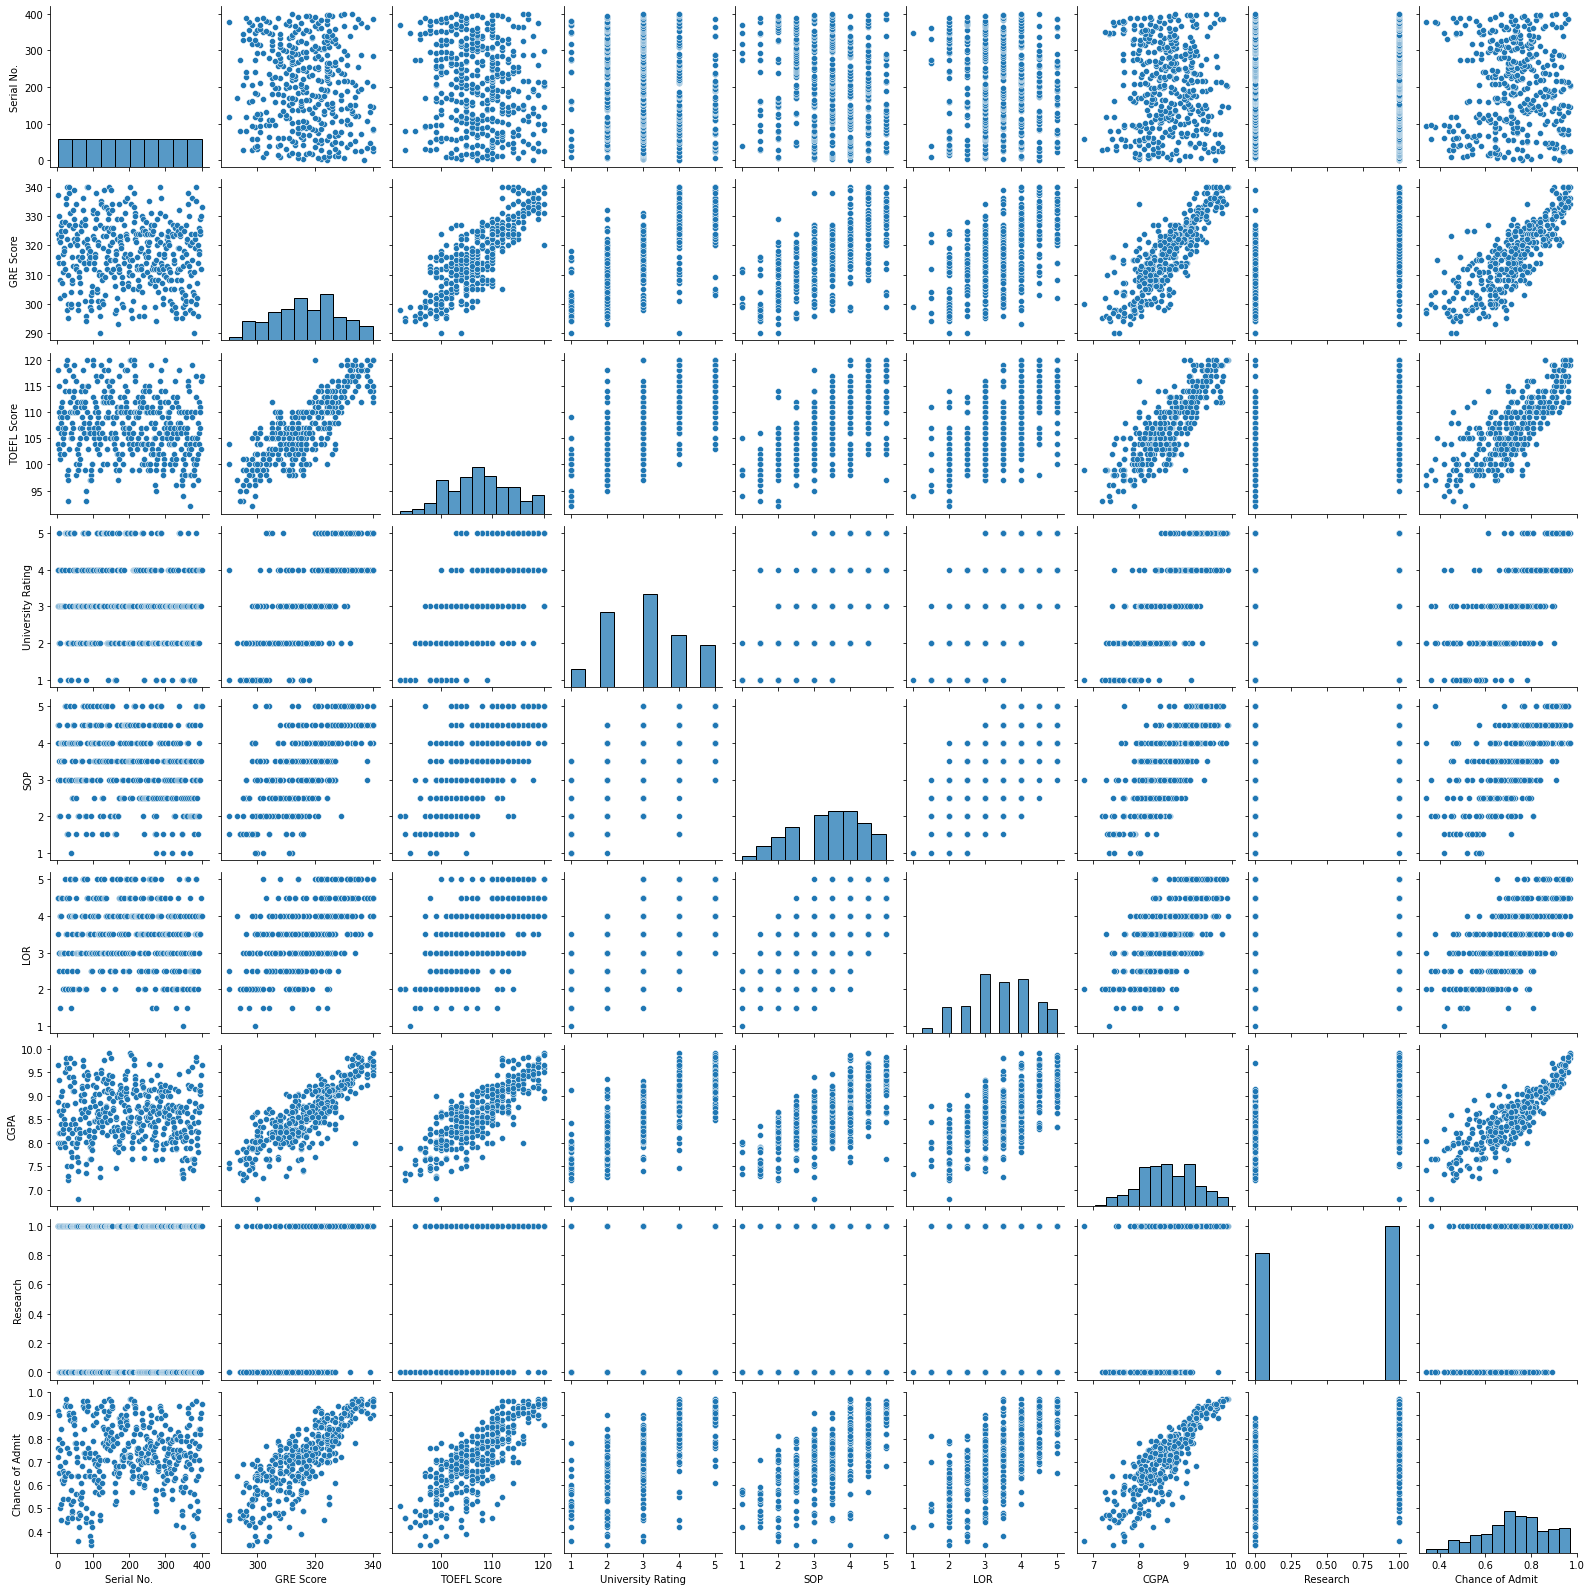

In [14]:
sns.pairplot(data=data)

In [15]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


**HEATMAP**

**A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. Heatmaps are used in various forms of analytics but are most commonly used to show user behaviour on specific webpages or webpage templates.**



<AxesSubplot:>

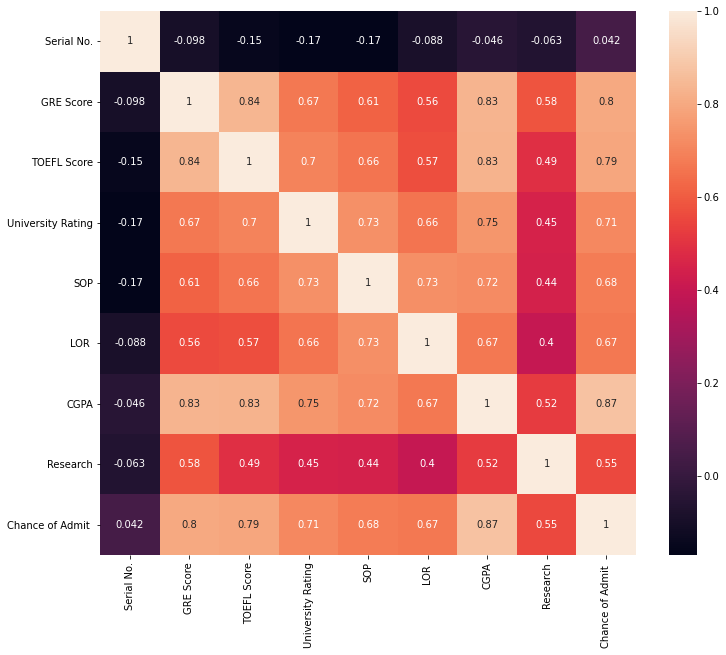

In [16]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)


**SWARM PLOT**


**swarmplot() Draw a categorical scatterplot with non-overlapping points. A swarm plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.**

<AxesSubplot:xlabel='University Rating', ylabel='GRE Score'>

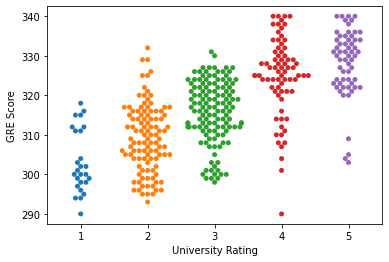

In [17]:
sns.swarmplot(x="University Rating",y="GRE Score",data=data)

**RELPLOT**

**The one we will use most is relplot() . This is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. relplot() combines a FacetGrid with one of two axes-level functions: scatterplot() (with kind="scatter" ; the default)**


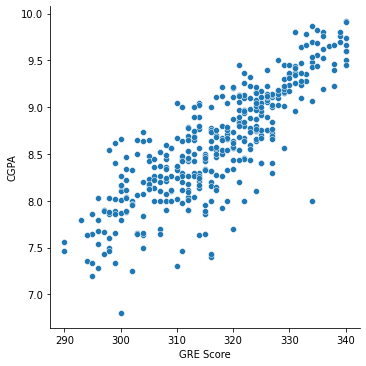

In [18]:
sns.relplot(x="GRE Score",y="CGPA",data=data)

**BOXPLOT**

**A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.**



<AxesSubplot:xlabel='University Rating', ylabel='GRE Score'>

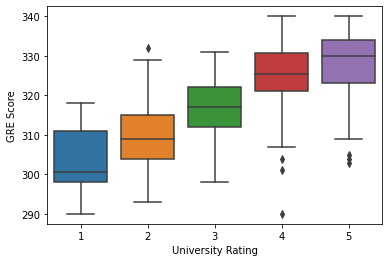

In [19]:
sns.boxplot(x="University Rating",y="GRE Score",data=data)

**REGPLOT**

**This method is used to plot data and a linear regression model fit. ... If strings, these should correspond with column names in “data”. When pandas objects are used, axes will be labeled with the series name. data: This is dataframe where each column is a variable and each row is an observation.**



<AxesSubplot:xlabel='TOEFL Score', ylabel='CGPA'>

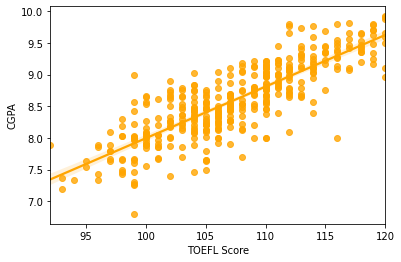

In [20]:
sns.regplot(x="TOEFL Score",y="CGPA",data=data,color='orange')

**VIOLIN PLOT**

**A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.**


<AxesSubplot:xlabel='University Rating', ylabel='GRE Score'>

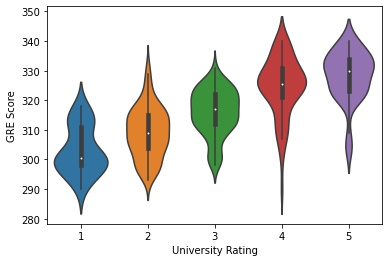

In [21]:
sns.violinplot(x="University Rating",y="GRE Score",data=data)

**LINEPLOT**

**A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.**



<AxesSubplot:xlabel='CGPA', ylabel='GRE Score'>

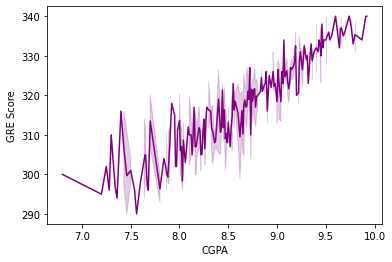

In [22]:
sns.lineplot(x="CGPA",y="GRE Score",data=data,color='purple')

**JOINTPLOT**

**Seaborn's jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. This plot is a convenience class that wraps JointGrid.**



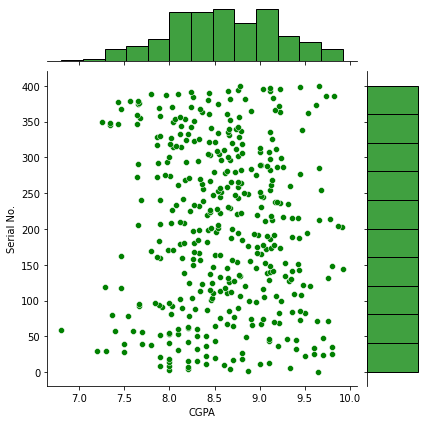

In [23]:
sns.jointplot(x="CGPA",y="Serial No.",data=data,color='g')

<AxesSubplot:xlabel='University Rating', ylabel='CGPA'>

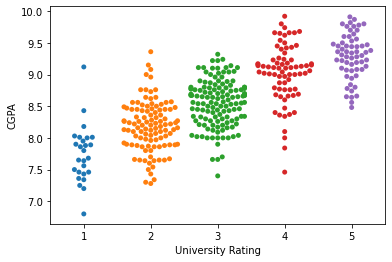

In [24]:
sns.swarmplot(x="University Rating",y="CGPA",data=data)

**BARPLOT**

**A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.**



<AxesSubplot:xlabel='University Rating', ylabel='CGPA'>

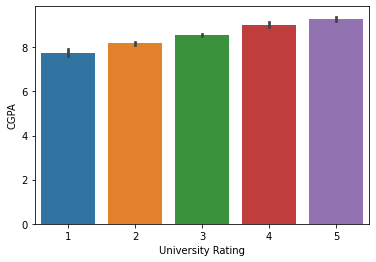

In [25]:
sns.barplot(x="University Rating",y="CGPA",data=data)

<AxesSubplot:xlabel='SOP', ylabel='GRE Score'>

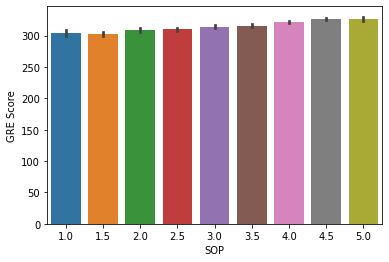

In [26]:
sns.barplot(x="SOP",y="GRE Score",data=data)

**SCATTER PLOT**

**A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.**



<AxesSubplot:xlabel='CGPA', ylabel='GRE Score'>

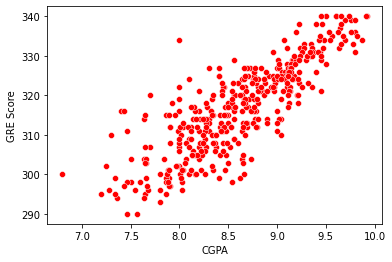

In [27]:
sns.scatterplot(x="CGPA",y="GRE Score",data=data,color='r')

In [28]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

**KDE PLOT (DENSITY PLOT)**

**KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable. We can also plot a single graph for multiple samples which helps in more efficient data visualization.**



<AxesSubplot:xlabel='University Rating', ylabel='CGPA'>

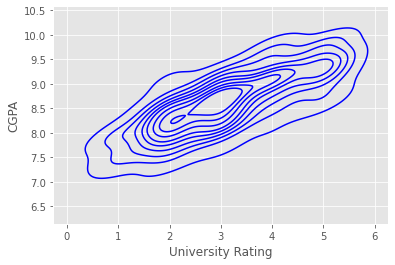

In [29]:
plt.style.use("ggplot")

sns.kdeplot(x="University Rating",y="CGPA",data=data,color='blue')


# **TRAINING AND TESTING DATA**

In [30]:
x = data.drop('Chance of Admit ',axis=1)
y = data['Chance of Admit ']


In [31]:
from sklearn.linear_model import LassoLars,LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.metrics import r2_score,accuracy_score
from sklearn.model_selection import train_test_split

In [32]:
# Splitting training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y,
                     test_size = 0.3, random_state = 30)
 


In [33]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))


280
120
280
120


# MODELS

**This is a Regression Problem so we will use regression models.**

# **LINEAR REGRESSION**

**Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.**


In [34]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)


LinearRegression()

In [35]:
y_pred = lin_reg.predict(x_test)
 
print(f"r2 Score of test set : {r2_score(y_test, y_pred)}")

r2 Score of test set : 0.8115762697005029


In [36]:
lin_reg.intercept_

-1.1992818052863878

In [37]:
lin_reg.coef_

array([0.0001423 , 0.00216337, 0.00229962, 0.0071734 , 0.00446566,
       0.02239259, 0.09726295, 0.02873565])

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(y_test,y_pred)

0.004315212229416474

In [39]:
mean_absolute_error(y_test,y_pred)

0.046972483824107715

In [40]:
model = LinearRegression(normalize=True)
model.fit(x_test, y_test)
model.score(x_test, y_test)*100


84.64236485097989

# **RIDGE REGRESSION**

**Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.**

In [41]:
rid = Ridge(alpha=1.0)
rid.fit(x_train, y_train)
Ridge()


Ridge()

In [42]:
y_pred = rid.predict(x_test)
 
print(f"r2 Score of test set : {r2_score(y_test, y_pred)}")

r2 Score of test set : 0.8108726548485892


In [43]:
rid.coef_

array([0.00014501, 0.0022624 , 0.00242964, 0.00757691, 0.00490531,
       0.02267273, 0.09253195, 0.02826246])

In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(y_test,y_pred)

0.004331326162671861

In [45]:
rid.score(x_test, y_test)*100

81.08726548485892

# **LASSO REGRESSION**

**Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).**

In [46]:
las = Lasso(alpha=1.0)
las.fit(x_train, y_train)
Lasso()


Lasso()

In [47]:
y_pred = las.predict(x_test)
 
print(f"r2 Score of test set : {r2_score(y_test, y_pred)}")

r2 Score of test set : 0.2054986787374471


In [48]:
las.coef_

array([0.        , 0.00193176, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(y_test,y_pred)

0.018195382356300086

In [50]:
las.score(x_test, y_test)*100

20.54986787374471

# **LEAST ANGLE REGRESSION**

**In statistics, least-angle regression is an algorithm for fitting linear regression models to high-dimensional data. LassoLars is a lasso model implemented using the LARS algorithm, and unlike the implementation based on coordinate descent, this yields the exact solution, which is piecewise linear as a function of the norm of its coefficients. Lasso model fit with Least Angle Regression a.k.a. Lars.**

In [51]:

from sklearn.linear_model import LassoLars
from sklearn.metrics import r2_score


In [52]:
regressor = LassoLars(alpha = 0.1)
regressor.fit(x_train, y_train)

LassoLars(alpha=0.1)

In [53]:
regressor.intercept_

0.7304285714285713

In [54]:
regressor.coef_

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [55]:
y_pred = regressor.predict(x_test)
 
print(f"r2 Score of test set : {r2_score(y_test, y_pred)}")

r2 Score of test set : -0.017926436905774112


In [56]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(y_test,y_pred)



0.02331218367346938

In [57]:
mean_absolute_error(y_test,y_pred)

0.12185476190476191

# CONCLUSION :

**We got a accuracy of about 85 % using Linear Regression and 81 % using Ridge Regression.**

**The accuracy of other models can be increased by HyperTuning.**

# **Thank You**